In [3]:
import numpy as np

# Load the dataset from the provided NPY files
train_data_path = 'C:/Users/mhm25/Desktop/ITU/3rdSemester/Machine Learning/MLProject2024/MLProject2024/fashion_train.npy'
test_data_path = 'C:/Users/mhm25/Desktop/ITU/3rdSemester/Machine Learning/MLProject2024/MLProject2024/fashion_test.npy'

# Load the training and test data
train_data = np.load(train_data_path)
test_data = np.load(test_data_path)

# Inspect the shape of the dataset to understand its structure
train_data.shape, test_data.shape


((10000, 785), (5000, 785))

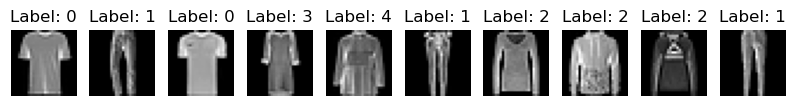

In [4]:
import matplotlib.pyplot as plt

# Split the data into features and labels for both train and test sets
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Reshape the first few images to 28x28 and visualize them with their corresponding labels
def plot_sample_images(X, y, num_samples=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {int(y[i])}")
        plt.axis('off')
    plt.show()

# Plot 10 sample images from the training data
plot_sample_images(X_train, y_train)


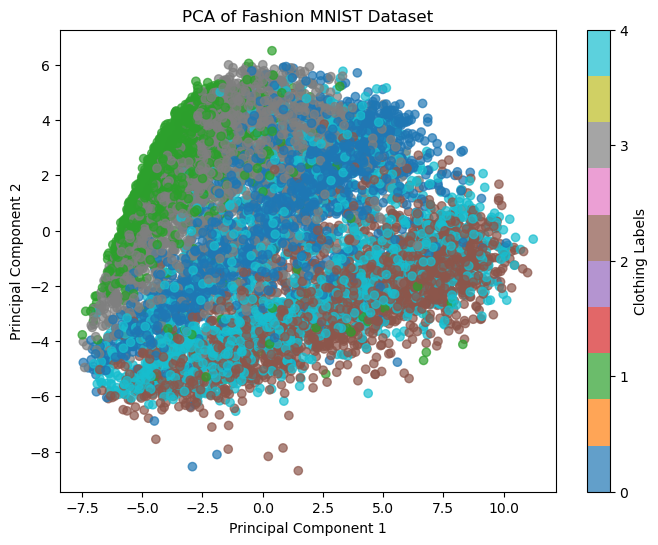

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Feature scaling: Normalize the pixel values to a range between 0 and 1
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Check the min and max values after scaling to confirm the normalization
X_train_scaled.min(), X_train_scaled.max()


# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Create a scatter plot with the two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=[0, 1, 2, 3, 4], label='Clothing Labels')
plt.title("PCA of Fashion MNIST Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


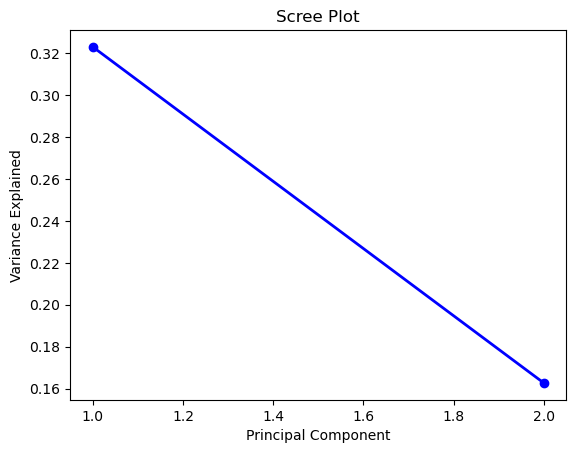

In [12]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()